## Machine Learning With Scikit-Learn 

## Summary

In this module, we will use the scikit learn package in python to create a predictive model to predict someone's salary based on their time spent studying in hours per month.

In [68]:
#Python Version
from platform import python_version
print('The pytho version: ', python_version())

The pytho version:  3.9.13


In [69]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Loading Data

In [70]:
#Loading dataset
dataset = pd.read_csv('dataset.csv')

In [71]:
dataset.shape

(500, 2)

In [72]:
dataset.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [73]:
dataset.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [74]:
#Rename columns
dataset.rename(columns={'horas_estudo_mes' : 'study_hours_per_month', 'salario' : 'Salary'}, inplace = True)

In [75]:
dataset.head()

,study_hours_per_month,Salary
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   study_hours_per_month  500 non-null    float64
 1   Salary                 500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


### Exploratory Analysis - Statistical Summary 

In [77]:
#checking missing values
dataset.isna().sum()

study_hours_per_month    0
Salary                   0
dtype: int64

In [78]:
#Statistical summary of dataset
dataset.describe()

,study_hours_per_month,Salary
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [79]:
#Correlation
dataset.corr()

,study_hours_per_month,Salary
study_hours_per_month,1.000000,0.818576
Salary,0.818576,1.000000


In [80]:
# Summary statistics of the predictor variable
dataset['study_hours_per_month'].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: study_hours_per_month, dtype: float64

<Axes: xlabel='study_hours_per_month', ylabel='Count'>

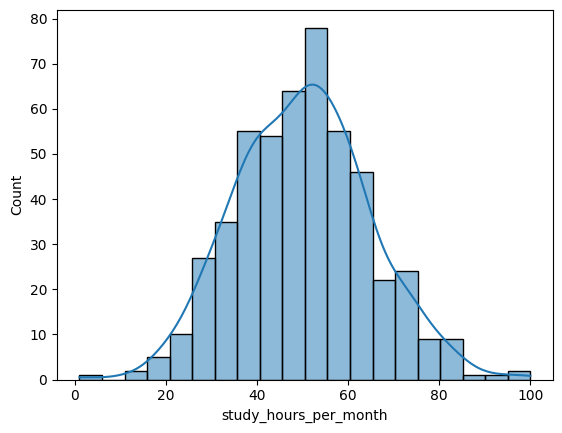

In [81]:
# Histogram of the predictor variable
sns.histplot(data = dataset, x = 'study_hours_per_month', kde = True)

## Data Preparation

In [82]:
# Prepare the input variable X
X = np.array(dataset['study_hours_per_month'])

In [83]:
type(X)

numpy.ndarray

In [84]:
# Adjust the shape of X
X = X.reshape(-1,1)

In [85]:
# Prepare the target variable
y = dataset['Salary']

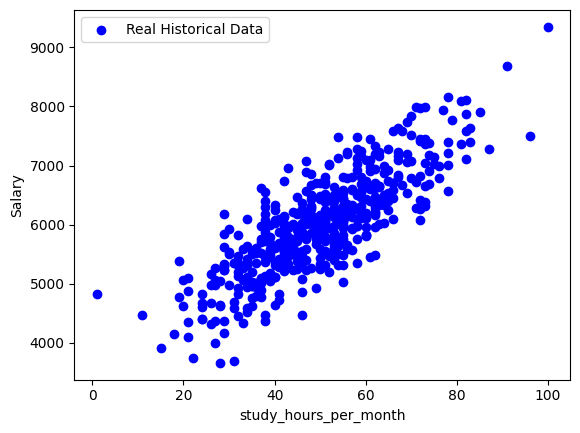

In [86]:
# Scatter plot between X and y
plt.scatter(X, y, color = 'blue', label = 'Real Historical Data')
plt.xlabel('study_hours_per_month')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [87]:
# Split data into training and testing
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [88]:
X_training.shape

(400, 1)

In [89]:
X_test.shape

(100, 1)

In [90]:
y_training.shape

(400,)

In [91]:
y_test.shape

(100,)

## Predictive Modeling (Machine Learning) 

In [92]:
# Create the simple linear regression model
model = LinearRegression()

In [93]:
#Training the model
model.fit(X_training, y_training)

LinearRegression()

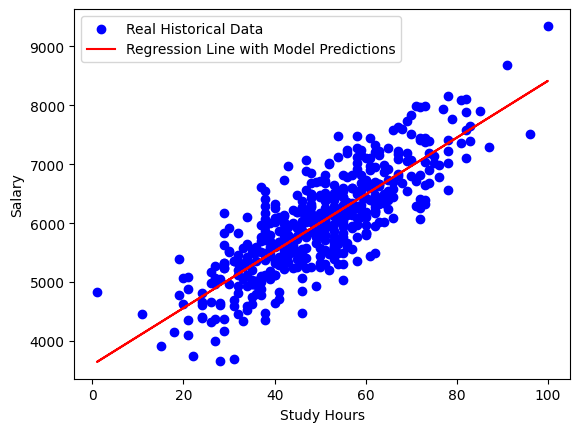

In [94]:
# Visualize the linear regression line (predictions) and the actual data used in training
plt.scatter(X, y, color = 'blue', label = 'Real Historical Data')
plt.plot(X, model.predict(X), color = 'red', label = 'Regression Line with Model Predictions')
plt.xlabel('Study Hours')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [95]:
# Evaluate the model on the test data
score = model.score(X_test, y_test)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.59


In [96]:
# Intercept - w0 parameter
model.intercept_

3596.7837243727527

In [97]:
# Slope - parameter w1
model.coef_

array([48.18185277])

## Model Deployment 

We will use the model to predict salary based on study hours.

In [98]:
# Define um novo valor para horas de estudo
new_study_hours = np.array([[48]]) 

# Make prediction with the trained model
expected_salary = model.predict(new_study_hours)

print(f"If you study about", new_study_hours, "hours per month your salary can be equal to", expected_salary)

If you study about [[48]] hours per month your salary can be equal to [5909.5126574]


In [99]:
# Same result as before using the parameters (coefficients) learned by the model
# y_new = w0 + w1 * X
salary = model.intercept_ + (model.coef_ * new_study_hours)
print(salary)

[[5909.5126574]]


In [100]:
# Sets a new value for study hours
new_study_hours = np.array([[65]]) 

# Make prediction with the trained model
expected_salary = model.predict(new_study_hours)

print(f"If you study about", new_study_hours, "hours per month your salary can be equal to", expected_salary)

If you study about [[65]] hours per month your salary can be equal to [6728.60415452]


In [101]:
# Sets a new value for study hours
new_study_hours = np.array([[73]]) 

# Make prediction with the trained model
expected_salary = model.predict(new_study_hours)

print(f"If you study about", new_study_hours, "hours per month your salary can be equal to", expected_salary)

If you study about [[73]] hours per month your salary can be equal to [7114.05897669]
